In [21]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as matimg
import tensorflow as tf
import pandas as pd
import numpy as np
import pathlib
import cv2
import os

In [22]:
import kagglehub

path = kagglehub.dataset_download("muratkokludataset/rice-image-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/rice-image-dataset


In [23]:
path = pathlib.Path(path)
path = os.path.join(path, 'Rice_Image_Dataset')
path = pathlib.Path(path)

In [24]:
arborio   = list(path.glob('Arborio/*'))[:100]
basmati   = list(path.glob('Basmati/*'))[:100]
ipsala    = list(path.glob('Ipsala/*'))[:100]
jasmine   = list(path.glob('Jasmine/*'))[:100]
karacadag = list(path.glob('Karacadag/*'))[:100]

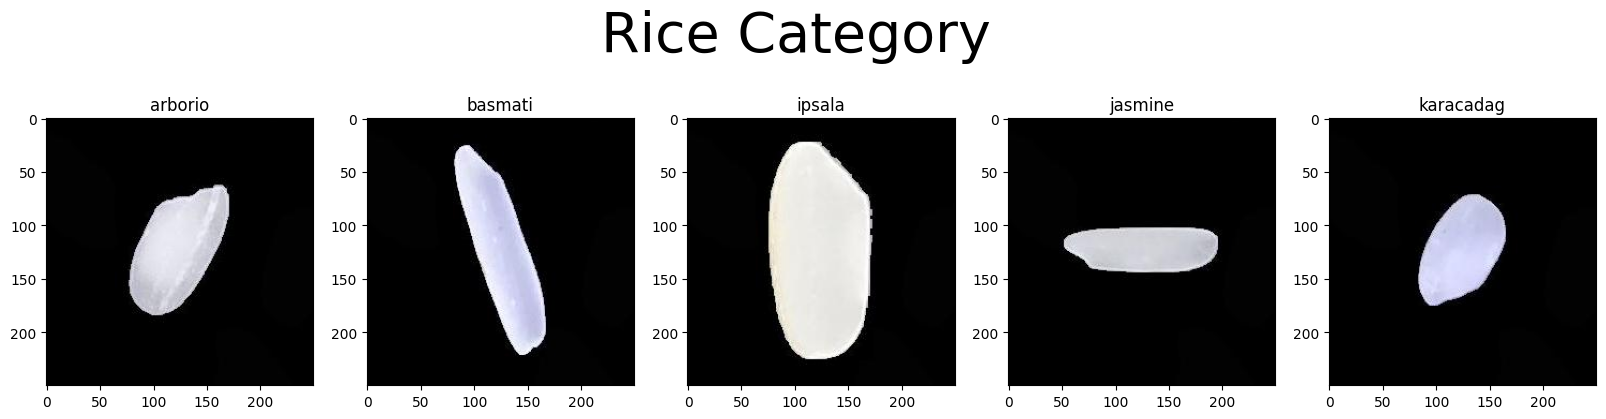

In [25]:
arborio_img   = matimg.imread(arborio[0])
basmati_img   = matimg.imread(basmati[0])
ipsala_img    = matimg.imread(ipsala[0])
jasmine_img   = matimg.imread(jasmine[0])
karacadag_img = matimg.imread(karacadag[0])

fig,ax = plt.subplots(ncols=5, figsize=(20,5))
fig.suptitle ('Rice Category', fontsize=40)

ax[0].set_title("arborio")
ax[1].set_title("basmati")
ax[2].set_title("ipsala")
ax[3].set_title("jasmine")
ax[4].set_title("karacadag")
ax[0].imshow(arborio_img)

ax[1].imshow(basmati_img)
ax[2].imshow(ipsala_img)
ax[3].imshow(jasmine_img)
ax[4].imshow(karacadag_img)

plt.show()

In [26]:
data_images = {
    'arborio' : arborio,
    'basmati' : basmati,
    'ipsala' : ipsala,
    'jasmine' : jasmine,
    'karacadag': karacadag
}

# numerical labels for the categories
data_labels = {
    'arborio' : 0,
    'basmati' : 1,
    'ipsala' : 2,
    'jasmine' : 3,
    'karacadag': 4
}

In [27]:
X, y = [], [] # X = images, y = labels
for label, images in data_images.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img, (224, 224)) # Resizing the images to be able to pass on MobileNetv2 model
    X.append(resized_img)
    y.append(data_labels[label])


X = np.array(X)
X = X/255
y = np.array(y)

In [28]:
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val)

In [29]:
base_model = tf.keras.applications.MobileNetV2(weights="imagenet",
                       include_top=False,
                       input_shape=(224, 224, 3))

In [30]:
base_model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [31]:
top_model = tf.keras.models.Sequential()
top_model.add(tf.keras.layers.Flatten(input_shape=base_model.output_shape[1:]))
top_model.add(tf.keras.layers.Dense(32, activation="relu"))
top_model.add(tf.keras.layers.Dense(10, activation="softmax"))

top_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 62720)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │     2,007,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,007,402 (7.66 MB)

 Trainable params: 2,007,402 (7.66 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
transfer_model = tf.keras.models.Sequential()
transfer_model.add(base_model)
transfer_model.add(top_model)

transfer_model.layers[0].trainable = False
transfer_model.summary()

transfer_model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])


history = transfer_model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_2 (Sequential)       │ (None, 10)             │     2,007,402 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,265,386 (16.27 MB)

 Trainable params: 2,007,402 (7.66 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - acc: 0.4272 - loss: 5.8798 - val_acc: 0.8438 - val_loss: 1.6143
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - acc: 0.8817 - loss: 0.6781 - val_acc: 0.9375 - val_loss: 0.4398
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - acc: 0.9781 - loss: 0.1224 - val_acc: 0.9375 - val_loss: 0.6986
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - acc: 0.9885 - loss: 0.1165 - val_acc: 0.9688 - val_loss: 0.3831
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - acc: 0.9973 - loss: 0.0274 - val_acc: 0.9688 - val_loss: 0.2062
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - acc: 1.0000 - loss: 0.0024 - val_acc: 0.9688 - val_loss: 0.1208
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - acc: 1.0000 - loss: 0.0020 - val_acc: 0.9688 - val_loss: 0.1040
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - acc: 1.0000 - loss: 9.0260e-04 - val_acc: 0.9688 - val_loss: 0.1401
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - acc: 1.0000 - lo

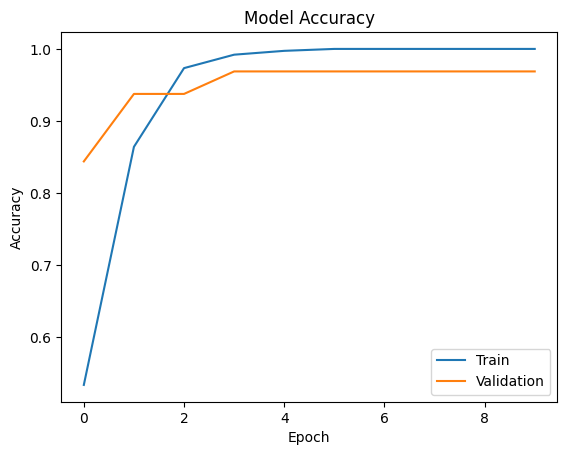

In [33]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'lower right')
plt.show()

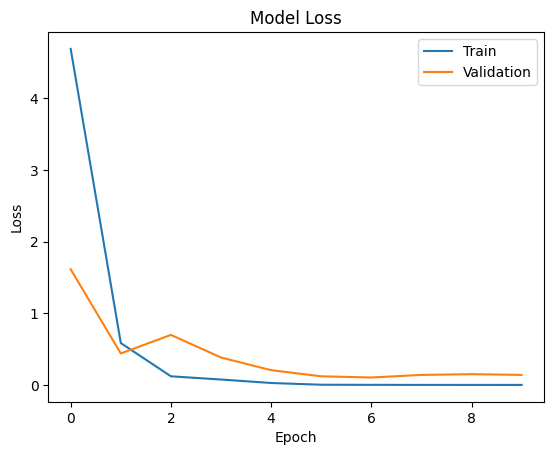

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper right')
plt.show()

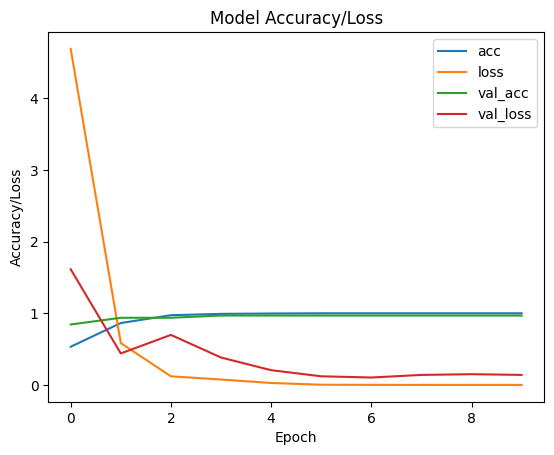

In [35]:
pd.DataFrame(history.history).plot()
plt.title('Model Accuracy/Loss')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epoch')
plt.show()

In [36]:
transfer_model.evaluate(X_test, y_test)

/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - acc: 0.9590 - loss: 0.3235


[0.28255632519721985, 0.9569892287254333]

In [37]:
img1 = cv2.imread(pathlib.Path(os.path.join(path, 'Basmati', 'basmati (10).jpg')))
img1 = cv2.resize(img1, (224, 224))
img1 = np.array(img1)
img1 = img1/255
img1 = np.expand_dims(img1, 0)
pred = transfer_model.predict(img1)
pred = pred.argmax()
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


np.int64(1)

In [38]:
for i, j in data_labels.items():
  if pred == j:
    print(i)


basmati


In [39]:
transfer_model.save('rice_classification.h5')

In [40]:
transfer_model.save('rice_classification.keras')